In [1]:
import pandas as pd
from scipy import stats

In [2]:
scores = pd.read_csv("scores.csv")

In [3]:
scores

,lang,BLEU_num_beams_1,chrF++_num_beams_1,COMET_num_beams_1
0,afr_Latn,37.496051,63.591824,0.8660
1,arb_Arab,26.069451,53.587915,0.8627
2,bul_Cyrl,38.570824,62.250001,0.9015
3,cat_Latn,40.476136,62.695251,0.8711
4,ces_Latn,29.600198,54.107049,0.9015
5,cmn_Hans,24.794815,18.059477,0.7682
6,cmn_Hant,11.910663,11.346481,0.7062
7,ekk_Latn,22.685189,52.501153,0.8901
8,ell_Grek,25.444441,49.408092,0.8799
9,eus_Latn,12.924595,44.619553,0.8230


In [4]:
lang_data = pd.read_csv("../lang_data/lang_data.csv")

In [7]:
corr_data = pd.merge(scores, lang_data[["lang", "ttr_flores"]], on="lang", how="left")

In [8]:
# Drop rows with NaN values
corr_data = corr_data.dropna()

<BarContainer object of 28 artists>

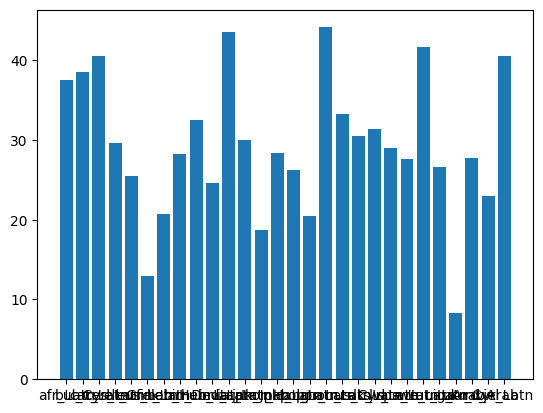

In [38]:
# Bar plot of BLEU scores
import matplotlib.pyplot as plt

plt.bar(corr_data["lang"], corr_data["BLEU_num_beams_1"])

In [5]:
lang_data

,lang,iso_code,wals_code,script,variety,name,family,genus,d_syn,train_frac_estimate,...,lh,lh_sd,is,is_sd,mfh,mfh_sd,-ia,-ia_sd,h_dep_avg,h_codep_avg
0,ace_Arab,ace,ace,Arab,achi1257,Acehnese (Arabic script),Austronesian,Malayo-Sumbawan,0.67,0.000001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ace_Latn,ace,ace,Latn,achi1257,Acehnese (Latin script),Austronesian,Malayo-Sumbawan,0.67,0.000477,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,acm_Arab,acm,arq,Arab,meso1252,Mesopotamian Arabic,Afro-Asiatic,Semitic,0.68,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,acq_Arab,acq,NaN,Arab,taiz1242,Taʽizzi-Adeni Arabic,Eastern Sudanic,Eastern Nilotic,0.57,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,aeb_Arab,aeb,atu,Arab,tuni1259,Tunisian Arabic,Afro-Asiatic,Semitic,0.93,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,yor_Latn,yor,yor,Latn,yoru1245,Yoruba,Niger-Congo,Defoid,0.61,0.003408,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,yue_Hant,yue,cnt,Hant,xian1255,Yue Chinese (Hong Kong Cantonese),Sino-Tibetan,Chinese,0.59,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.514204,NaN
209,zgh_Tfng,zgh,NaN,Tfng,stan1324,Standard Moroccan Tamazight,Eastern Sudanic,Eastern Nilotic,0.57,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,zsm_Latn,zsm,mly,Latn,stan1306,Standard Malay,Austronesian,Malayo-Sumbawan,0.79,0.016844,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
corr_data

,lang,BLEU_num_beams_1,chrF++_num_beams_1,COMET_num_beams_1,ttr_flores
0,afr_Latn,37.496051,63.591824,0.8660,0.251596
1,arb_Arab,26.069451,53.587915,0.8627,0.458217
2,bul_Cyrl,38.570824,62.250001,0.9015,0.355773
3,cat_Latn,40.476136,62.695251,0.8711,0.244440
4,ces_Latn,29.600198,54.107049,0.9015,0.437593
5,cmn_Hans,24.794815,18.059477,0.7682,0.947899
6,cmn_Hant,11.910663,11.346481,0.7062,0.951715
7,ekk_Latn,22.685189,52.501153,0.8901,0.495716
8,ell_Grek,25.444441,49.408092,0.8799,0.322230
9,eus_Latn,12.924595,44.619553,0.8230,0.420188


In [20]:
stats.normaltest(corr_data["chrF++_num_beams_1"])

NormaltestResult(statistic=17.20814092376902, pvalue=0.00018335792117757393)

In [12]:
corr_data.corr()

/var/folders/_9/cn5fn8814d515j08vlk28lmm0000gn/T/ipykernel_1193/2586999277.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_data.corr()


,BLEU_num_beams_1,chrF++_num_beams_1,COMET_num_beams_1,ttr_flores
BLEU_num_beams_1,1.000000,0.729202,0.547416,-0.540409
chrF++_num_beams_1,0.729202,1.000000,0.751282,-0.851729
COMET_num_beams_1,0.547416,0.751282,1.000000,-0.498538
ttr_flores,-0.540409,-0.851729,-0.498538,1.000000


<AxesSubplot: xlabel='ttr_flores', ylabel='chrF++_num_beams_1'>

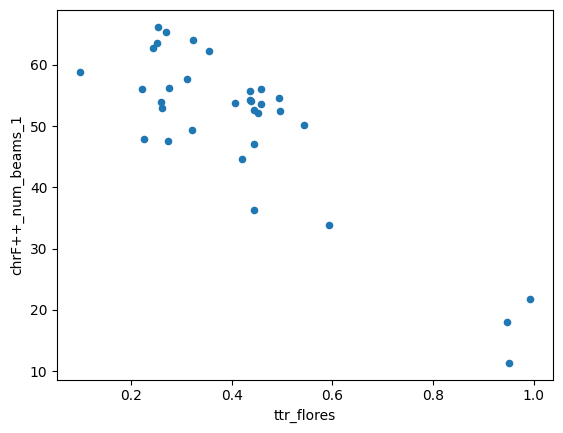

In [22]:
corr_data.plot.scatter(x="ttr_flores", y="chrF++_num_beams_1")

In [23]:
# Label the dots please
for i, row in corr_data.iterrows():
    plt.text(row["ttr_flores"], row["chrF++_num_beams_1"], row["lang"])

NameError: name 'plt' is not defined